In [52]:
import string
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re
from nltk.stem.snowball import SnowballStemmer



quotes_df = pd.read_csv('./quotes.csv')
quotes_df.dropna(inplace=True)
quotes_df.head()


,level_0,index,quote,author,tags,likes
0,0,0,Be yourself; everyone else is already taken.,Oscar Wilde,attributed-no-source;be-yourself;honesty;inspi...,149270
1,1,1,You've gotta dance like there's nobody watching,William W. Purkey,dance;heaven;hurt;inspirational;life;love;sing,118888
2,2,2,Be the change that you wish to see in the world.,Mahatma Gandhi,action;change;inspirational;philosophy;wish,106749
3,3,3,No one can make you feel inferior without your...,"Eleanor Roosevelt,",confidence;inspirational;wisdom,85854
4,4,4,Live as if you were to die tomorrow. Learn as ...,Mahatma Gandhi,carpe-diem;education;inspirational;learning,73033


## EDA :

In [53]:
data = pd.read_csv('./quotes.csv')
# Renaming author to Author/Book
data.rename(columns={'author': 'Author/Book'}, inplace=True)
data.head()

,level_0,index,quote,Author/Book,tags,likes
0,0,0,Be yourself; everyone else is already taken.,Oscar Wilde,attributed-no-source;be-yourself;honesty;inspi...,149270
1,1,1,You've gotta dance like there's nobody watching,William W. Purkey,dance;heaven;hurt;inspirational;life;love;sing,118888
2,2,2,Be the change that you wish to see in the world.,Mahatma Gandhi,action;change;inspirational;philosophy;wish,106749
3,3,3,No one can make you feel inferior without your...,"Eleanor Roosevelt,",confidence;inspirational;wisdom,85854
4,4,4,Live as if you were to die tomorrow. Learn as ...,Mahatma Gandhi,carpe-diem;education;inspirational;learning,73033


In [54]:
concat_quotes = ' '.join([i for i in data.quote.astype(str)])

In [55]:
# Removing unneccessary punctuation and tags
translator = str.maketrans('\n',' ',string.punctuation + string.digits + '`' + '[' + ']' + '“' + '”' + '-' + '–' + '’')
text = concat_quotes.translate(translator)


# Tokenization

tokens = nltk.word_tokenize(text.lower())

# Removing stopwords
from nltk.corpus import stopwords
en_stopwords = stopwords.words('english')
en_stopwords = set(en_stopwords)
words = [w.lower() for w in tokens if w not in en_stopwords]

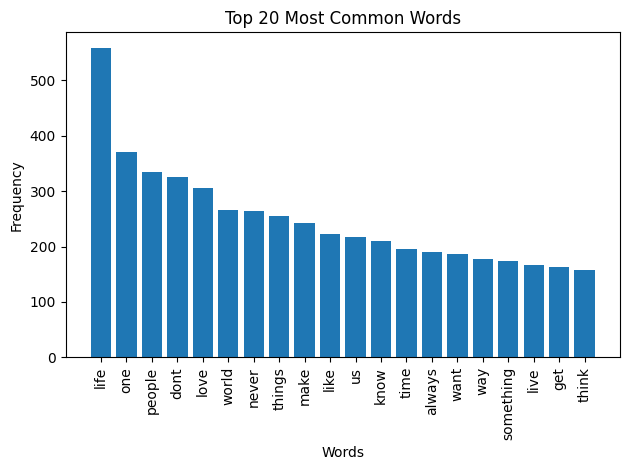

In [56]:
# Basic words Analysis
cnt_fdist = nltk.FreqDist(words)
common_words = [word[0] for word in cnt_fdist.most_common(20)]
word_freq = [freq[1] for freq in cnt_fdist.most_common(20)]

plt.bar(common_words, word_freq)
plt.title('Top 20 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Be yourself; everyone else is already taken. You've gotta dance like there's nobody watching Be the change that you wish to see in the world. No one can make you feel inferior without your consent. Live as if you were to die tomorrow. Learn as if you were to live forever. Darkness cannot drive out darkness: only light can do that. Hate cannot drive out hate: only love can do that. Without music, life would be a mistake. We accept the love we think we deserve. Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring. There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle. We are all in the gutter, but some of us are looking at the stars. Fairy tales are more than true: not because they tell us that dragons exist, but because they tell us that dragons can be beaten. Yesterday is history, tomorrow is a mystery, today is a gift of God, which is why we call it the pr

/home/tarik/Desktop/quotes/venv/lib/python3.12/site-packages/matplotlib/cbook.py:733: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  x = np.array(x, subok=True, copy=copy)


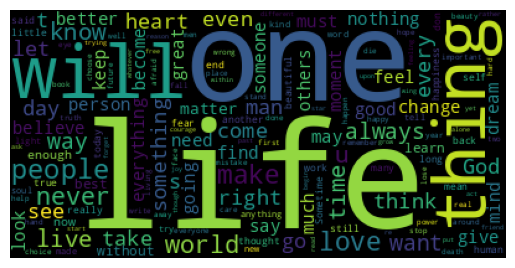

In [57]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
print(concat_quotes[:1000])

wordcloud = WordCloud(collocations=False).generate(concat_quotes)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

<Axes: xlabel='count', ylabel='Author/Book'>

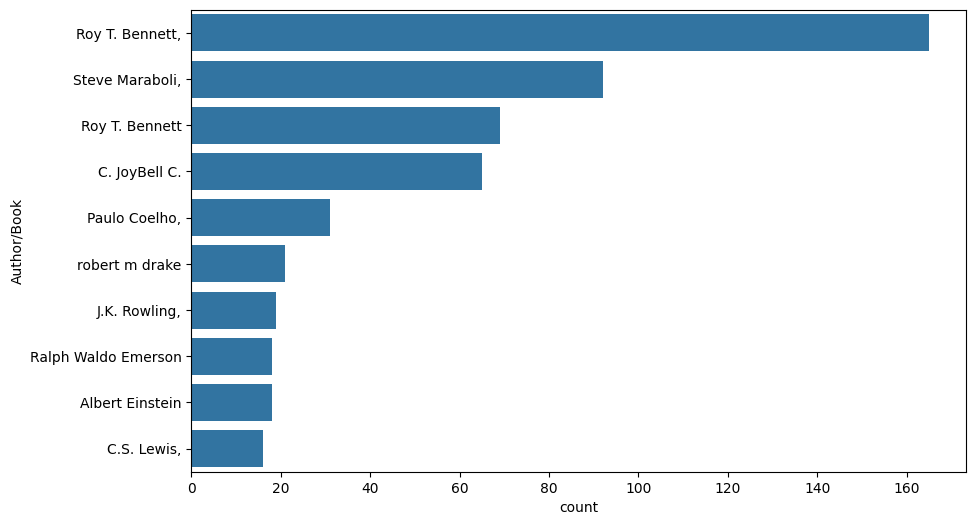

In [58]:
# Ploting The Most Common Authors
plt.figure(figsize=(10, 6))
sns.countplot(y='Author/Book', data=data, order=data['Author/Book'].value_counts().index[:10])

/tmp/ipykernel_198429/457774089.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=likes_by_author.values, y=likes_by_author.index, palette="viridis")


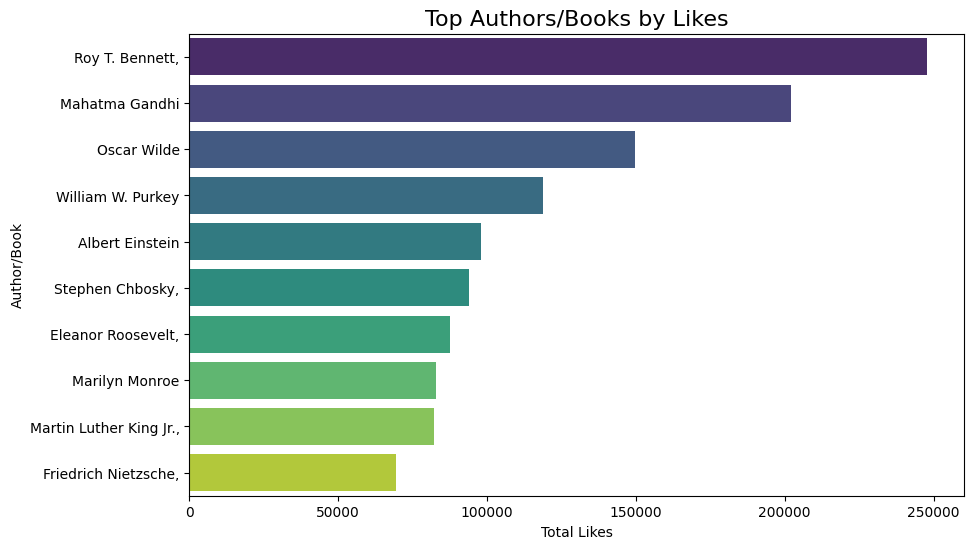

/tmp/ipykernel_198429/457774089.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=tags, palette="coolwarm")


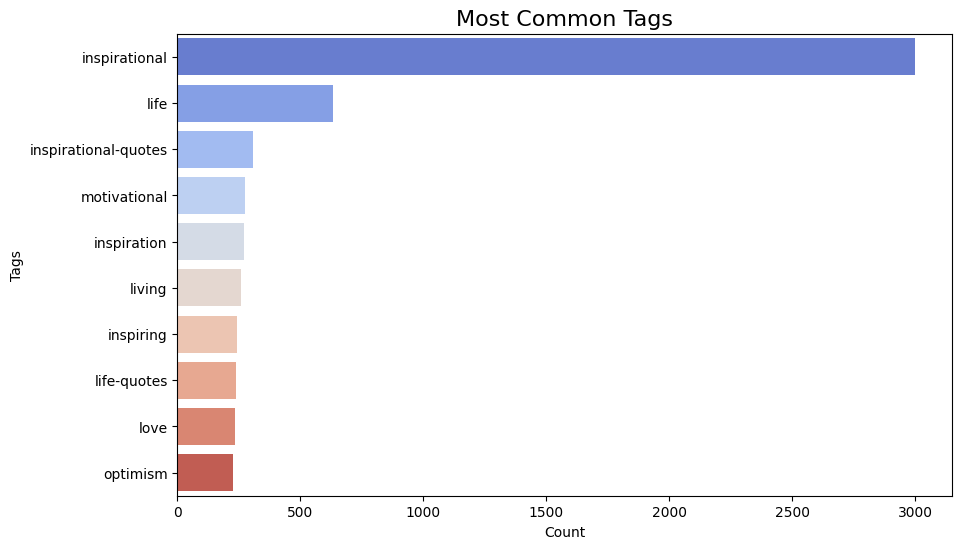

In [59]:
from collections import Counter
df = data
likes_by_author = df.groupby("Author/Book")["likes"].sum().sort_values(ascending=False).head(10)

# Visualization: Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=likes_by_author.values, y=likes_by_author.index, palette="viridis")
plt.title("Top Authors/Books by Likes", fontsize=16)
plt.xlabel("Total Likes")
plt.ylabel("Author/Book")
plt.show()

# 3. Likes by Tags
df["tags"] = df["tags"].str.split(";")
tags_flat = [tag for tags in df["tags"].dropna() for tag in tags]
tags_likes = Counter(tags_flat)

# Visualization: Top Tags
top_tags = Counter(tags_flat).most_common(10)
tags, counts = zip(*top_tags)
plt.figure(figsize=(10, 6))
sns.barplot(x=counts, y=tags, palette="coolwarm")
plt.title("Most Common Tags", fontsize=16)
plt.xlabel("Count")
plt.ylabel("Tags")
plt.show()

## HC :

In [60]:
quotes_df['text'] = quotes_df['quote'] + " " + quotes_df['tags'] + " " + quotes_df['author']

reduced_quotes_df = quotes_df.sample(n=100, random_state=42)


In [61]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

stemmer = SnowballStemmer("english")

def tokenize_and_stem(text):

    tokens = text
    word_tokenized = [token for tokens in nltk.sent_tokenize(tokens) for token in nltk.word_tokenize(tokens)]

    filtered_tokens = [token for token in word_tokenized if re.search('[a-zA-Z]', token)]

    stems = [stemmer.stem(word) for word in filtered_tokens]

    return stems


[nltk_data] Downloading package punkt to /home/tarik/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/tarik/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /home/tarik/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/tarik/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/tarik/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [62]:
vectorizer = TfidfVectorizer(stop_words='english', tokenizer=tokenize_and_stem)
X = vectorizer.fit_transform(quotes_df['text'])

linkage_matrix = linkage(X.toarray(), method='ward')

reduced_X = vectorizer.fit_transform(reduced_quotes_df['text'])
reduced_linkage_matrix = linkage(reduced_X.toarray(), method='ward', optimal_ordering=True) 

/home/tarik/Desktop/quotes/venv/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/home/tarik/Desktop/quotes/venv/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'to

### Dendrogram

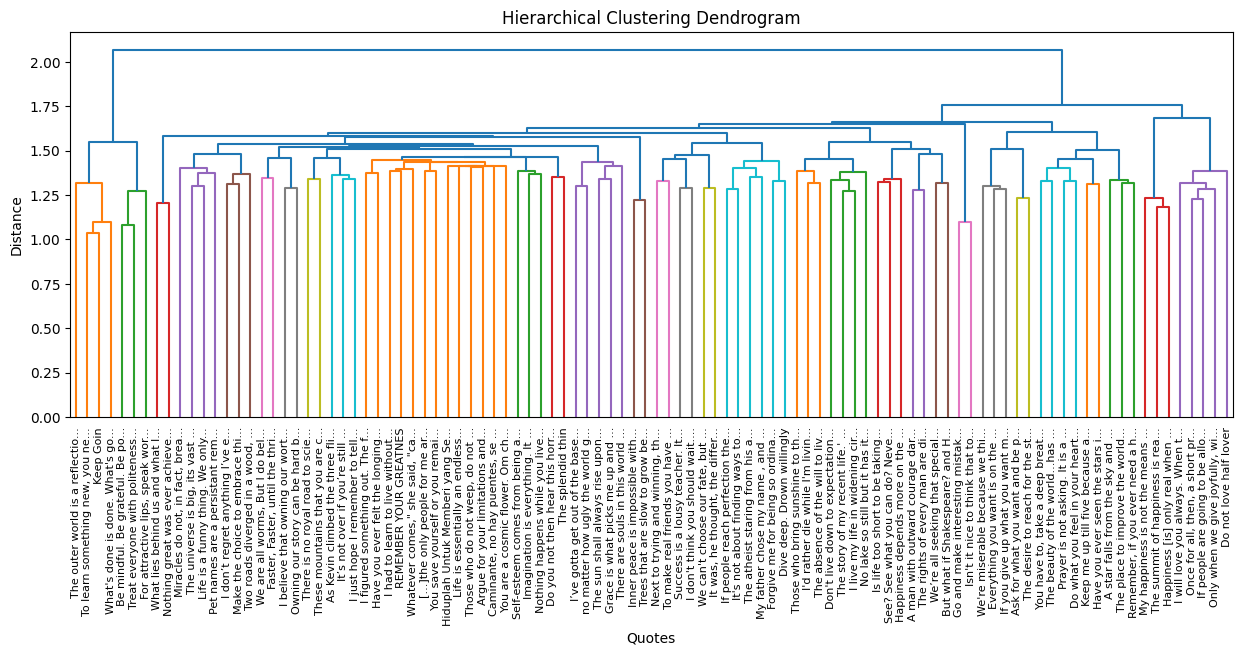

In [63]:
def truncate_quote(quote, max_length=30):
    if len(quote) > max_length:
        return quote[:max_length] + '...'
    return quote
reduced_quotes_df['truncated_quote'] = reduced_quotes_df['quote'].apply(truncate_quote)

plt.figure(figsize=(15, 5))
dendrogram(reduced_linkage_matrix, labels=reduced_quotes_df['truncated_quote'].values, leaf_rotation=90, leaf_font_size=8)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Quotes")
plt.ylabel("Distance")
plt.show()

In [64]:
from scipy.cluster.hierarchy import fcluster

threshold = 1.8

clusters = fcluster(linkage_matrix, t=threshold, criterion='distance')

quotes_df['cluster'] = clusters

num_clusters = len(set(clusters))
print(f"Number of clusters: {num_clusters}")

quotes_df[['quote', 'cluster']].head()

Number of clusters: 272


,quote,cluster
0,Be yourself; everyone else is already taken.,220
1,You've gotta dance like there's nobody watching,215
2,Be the change that you wish to see in the world.,235
3,No one can make you feel inferior without your...,60
4,Live as if you were to die tomorrow. Learn as ...,172


In [65]:
def get_nearest_quotes(index, n):
    num_quotes = len(quotes_df)
    
    pairwise_distances = squareform(pdist(X.toarray()))
    distances = [(i, pairwise_distances[index, i]) for i in range(num_quotes) if i != index]
    distances = sorted(distances, key=lambda x: x[1])

    same_cluster_indices = [
        i for i, _ in distances[:n] if i != index
    ] 

    nearest_indices = same_cluster_indices[:n]

    return nearest_indices

def get_nearest_quotes_cluster(quote_index, n):
    cluster = quotes_df.iloc[quote_index]['cluster']
    cluster_indices = quotes_df[quotes_df['cluster'] == cluster].index
    cluster_indices = [i for i in cluster_indices if i != quote_index]
    if len(cluster_indices) < n:
        return get_nearest_quotes( quote_index, n)
    

    return cluster_indices[:n]


In [66]:
nearest_quotes1 = get_nearest_quotes_cluster(1, 7)

In [67]:
nearest_quotes1

[154, 1375, 2064, 1437, 38, 496, 2171]

## KMeans

In [68]:
vectorizer = TfidfVectorizer(stop_words='english', tokenizer=tokenize_and_stem)
X = vectorizer.fit_transform(quotes_df['text'])


/home/tarik/Desktop/quotes/venv/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/home/tarik/Desktop/quotes/venv/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'to

/tmp/ipykernel_198429/592852870.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


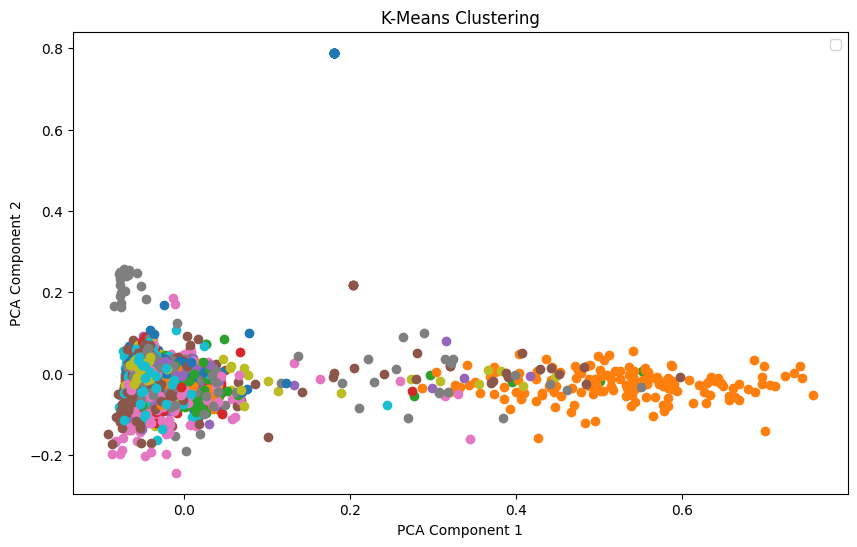

In [69]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

num_clusters = 100

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X)
quotes_df['cluster'] = cluster_labels

pca = PCA(n_components=2)
X_2d = pca.fit_transform(X.toarray())

plt.figure(figsize=(10, 6))
for cluster in range(num_clusters):
    cluster_points = X_2d[quotes_df['cluster'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1])
    
plt.title("K-Means Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

### 3D plot

/tmp/ipykernel_198429/1725674868.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


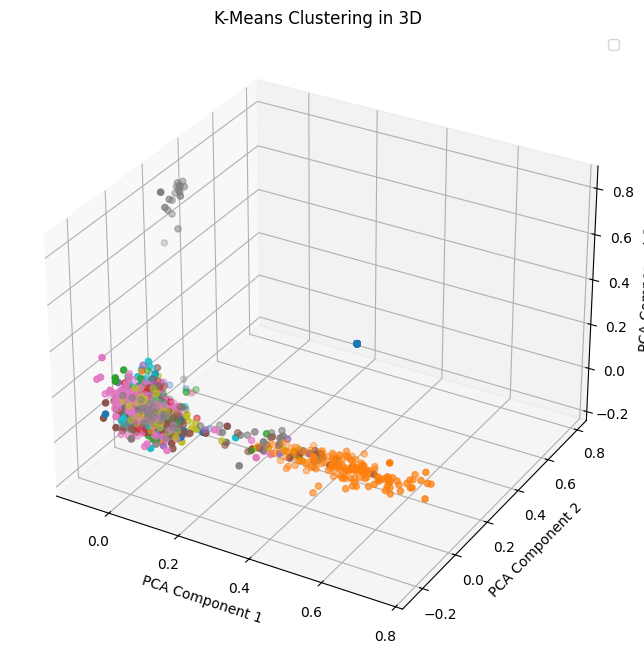

In [70]:

from mpl_toolkits.mplot3d import Axes3D 

pca = PCA(n_components=3)
X_3d = pca.fit_transform(X.toarray())

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster in range(num_clusters):
    cluster_points = X_3d[quotes_df['cluster'] == cluster]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2])

ax.set_title("K-Means Clustering in 3D")
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
ax.legend()
plt.show()



In [71]:
def get_recommendation_kmeans(quote_index, n):
    cluster = quotes_df.iloc[quote_index]['cluster']
    cluster_indices = quotes_df[quotes_df['cluster'] == cluster].index
    cluster_indices = [i for i in cluster_indices if i != quote_index]

    if len(cluster_indices) < n:
        return get_nearest_quotes(quote_index, n)

    return cluster_indices[:n]

In [72]:
recommendations = get_recommendation_kmeans(98, 7)
recommendations

[29, 168, 338, 468, 489, 520, 571]

# Association

In [73]:
import ast


users_df = pd.read_csv('users.csv')

users_df['likes'] = users_df['likes'].apply(ast.literal_eval)

users_df.head()

,name,likes
0,User1,"[512, 526, 15, 534, 23, 549, 552, 554, 555, 42..."
1,User2,"[1025, 1028, 1032, 1037, 1038, 1040, 20, 1044,..."
2,User3,"[1154, 1027, 259, 264, 778, 1038, 272, 1169, 2..."
3,User4,"[1152, 1153, 1154, 1156, 1030, 1286, 1033, 905..."
4,User5,"[1024, 1539, 1030, 1039, 1040, 1563, 1565, 105..."


In [74]:
transactions = users_df['likes'].tolist()

In [75]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder


te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_onehot = pd.DataFrame(te_ary, columns=te.columns_)


frequent_itemsets = apriori(df_onehot, min_support=0.01, use_colnames=True)

num_freq_itemsets = frequent_itemsets.shape[0]
rules = association_rules(frequent_itemsets,num_freq_itemsets, metric="confidence", min_threshold=0.5, support_only=False)

#print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

### Using Association Rules :

In [76]:
def recommend_quotes_association(user_likes, rules):
    recommendations = []
    for _, rule in rules.iterrows():
        if set(rule['antecedents']).issubset(user_likes):
            recommendations.extend(rule['consequents'])

    recommendations = set(recommendations) - set(user_likes)
    return list(recommendations)


user = 'User12'
user_likes = users_df.loc[users_df['name'] == user, 'likes'].values[0]
recommendations = recommend_quotes_association(user_likes, rules)

print(f"Recommended quotes for {user}:", recommendations)

Recommended quotes for User12: [641, 615, 684, 209, 601]
